___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



/////////////////////////////

‎Kitaplıkları İçeri Aktarma, Veri Kümesini Yükleme, Verileri Keşfetme‎

‎i. Kütüphaneleri İçe Aktarma‎

‎ *ii. Veri Alma *‎

‎iii. Verileri Keşfet‎

‎iv. Aykırı Değer Tespiti‎

‎v. Gereksiz özellikleri bırakın‎

//////////////////////////////

‎3.0.0.2 ‎‎ 2. Veri Ön İşleme‎

‎Ölçek (gerekirse)‎

‎Değerlendirme amacıyla veri çerçevesini ayırın‎

//////////////////////////////

‎3.0.0.3 ‎‎ 3. Çok Sınıflı Sınıflandırma‎

‎Kitaplıkları içe aktarma‎

‎SVM Sınıflandırıcı'yı uygulama‎

‎Karar Ağacı Sınıflandırıcısını Uygulama‎

‎Rasgele Orman Sınıflandırıcısı Uygulama‎

‎XGBoost Classifer'ı Uygulama‎

‎Modelleri Karşılaştırın‎

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#RF model import et
#XGBoost 
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline
# to get rid of the warnings

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

pd.set_option('display.max_rows', 1000)
# Set it None to display all columns in the dataframe
pd.set_option('display.max_columns', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

primary MOS: A United States military occupation code

In [2]:
df_male=pd.read_csv("ANSUR II MALE Public.csv",encoding="unicode_escape")
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [3]:
df_male.shape

(4082, 108)

In [4]:
df_female=pd.read_csv("ANSUR II FEMALE Public.csv")
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [5]:
df_female.shape

(1986, 108)

In [6]:
df_female.rename({"SubjectId":"subjectid"},axis=1,inplace=True)

In [7]:
df_female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [8]:
df=pd.concat([df_male,df_female],ignore_index=True)

In [9]:
df.shape

(6068, 108)

## Explore Data

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [11]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [12]:
#Drop Ethnicity feature(etnik ırkı belirlemede hangi ülke oılması önemli değil)
df.drop(columns="Ethnicity",inplace=True)#null değerler çoktu

In [13]:
df.shape

(6068, 107)

In [14]:
df.duplicated().sum()
#sonuçta id sütunu bi unique lik içeriyo, onu düşünce duplicate çıkabilir bazı data setlerinde,id sutunu düşünce tekrar duplicated bakılabilir

0

In [15]:
df.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00,6068.00
mean,20757.20,246.47,1406.16,327.37,224.89,1299.61,244.19,194.75,399.20,340.93,274.74,490.75,72.25,324.90,306.64,139.72,1020.08,241.62,870.15,609.00,497.10,386.04,1477.49,282.86,1022.10,251.74,1252.01,825.11,621.85,351.32,35.13,62.63,22.26,240.91,785.91,98.87,263.03,338.77,295.01,552.08,467.01,1102.05,84.95,203.86,189.29,152.18,570.04,196.33,332.62,70.76,348.39,385.73,1040.06,632.60,412.04,432.34,475.51,540.12,483.24,69.58,406.48,119.52,375.44,413.83,1388.40,113.92,416.19,259.19,1129.36,354.08,145.07,898.11,866.67,576.90,1763.79,1714.41,1402.95,1099.59,622.20,176.34,789.70,458.24,129.62,882.74,1630.31,460.52,317.75,914.50,229.67,377.00,1031.50,797.09,169.00,830.06,17.52,1.62,29.76,68.26,174.75
std,13159.39,37.40,79.09,20.72,16.05,72.02,16.85,13.52,30.24,41.52,19.22,42.14,5.34,17.09,20.79,7.31,76.42,26.48,54.82,33.79,29.08,30.65,84.32,20.66,100.67,26.78,79.58,54.75,45.33,29.94,3.23,4.88,3.17,28.51,41.87,6.66,17.39,23.24,30.05,62.37,30.03,68.55,6.35,15.55,11.51,6.24,18.29,8.49,22.46,5.93,25.30,32.40,59.87,36.51,43.07,38.66,33.07,34.20,29.36,7.27,33.23,7.88,39.77,38.16,85.85,7.14,31.27,19.78,92.83,22.60,12.42,45.30,57.52,38.26,110.83,90.02,78.77,60.54,57.75,16.22,53.82,29.76,6.66,54.40,98.62,36.68,36.36,114.27,35.61,31.62,62.70,156.53,13.12,47.65,550.95,0.98,8.67,3.86,33.69
min,10027.00,155.00,1115.00,249.00,156.00,1038.00,186.00,151.00,283.00,216.00,197.00,357.00,55.00,267.00,245.00,116.00,737.00,168.00,656.00,466.00,367.00,266.00,1184.00,213.00,695.00,170.00,984.00,6

In [16]:
df.describe(include="O")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
count,6068,6068,6068,6068,6068,6068,6068,6068
unique,2,253,12,3,3,285,152,3
top,Male,27-Feb-12,Camp Shelby,Regular Army,Combat Service Support,11B,California,Right hand
freq,4082,45,1160,3140,3174,671,446,5350


In [17]:
(df.Weightlbs==0).sum()

1

In [18]:
# features will be dropped 
# Date
# Installation
# subjectid
#Weightlbs = wristheight
#stature =  Heightin 

In [19]:
df[["SubjectNumericRace","DODRace"]].value_counts() #ikisi aynı değerleri içeriyor

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
31                  3           112
4                   4           108
51                  1            99
8                   2            94
21                  2            51
31                  1            47
6                   6            37
23                  2            26
41                  4            26
28                  2            25
51                  5            24
6                   4            21
41                  1            19
251                 2            18
5                   5            16
61                  1            15
3                   1            13
25                  2            13
18                  1            12
61                  6            12
8                   1            11
                    4            10
21                  1             9
61                  4             8


In [20]:
df[df.SubjectNumericRace != df.DODRace].shape  #df.SubjectNumericRace ile DODRace aynı veri özelliklerine sahip

(806, 107)

In [21]:
(df.SubjectNumericRace > 8).sum()/df.shape[0]

0.1051417270929466

In [22]:
df.SubjectNumericRace.value_counts().sort_index()

1        3561
2        1026
3         541
4         109
5          18
6          59
8         116
18         18
21         60
23         34
25         14
28         26
31        160
35          8
38          9
41         46
42          7
43          5
48          1
51        126
61         35
62          8
63          7
64          8
218         3
231         6
235         4
238         1
251        20
318         2
351        10
358         1
423         2
425         1
428         1
431         2
451         2
631         1
641         2
651         2
2351        2
2518        2
4251        1
42351       1
Name: SubjectNumericRace, dtype: int64

In [23]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [24]:
df[df.SubjectNumericRace == df.DODRace][["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
4                   4           108
6                   6            37
5                   5            16
dtype: int64

In [25]:
df.groupby("DODRace").PrimaryMOS.value_counts().head(10)

DODRace  PrimaryMOS
1        11B           500
         88M           197
         91B           159
         68W           152
         31B           150
         25U           107
         92A           103
         12B            99
         19D            98
         25B            98
Name: PrimaryMOS, dtype: int64

In [26]:
# features will be dropped

# Date
# Installation
# subjectid
# Weightlbs = weightkg
# Heightin = stature
# SubjectNumericRace
# PrimaryMOS
# SubjectsBirthLocation

In [27]:
df.drop(columns=["Date","Installation", "subjectid","Weightlbs","Heightin","SubjectNumericRace", "PrimaryMOS", "SubjectsBirthLocation"], inplace=True)

In [28]:
df.shape

(6068, 99)

In [29]:
#downgrade DODRace with observation value less than 500(gözlem değeri 500'den az olan DODRace'ı düşürme)

(df.DODRace.value_counts() < 500)

1    False
2    False
3    False
4     True
6     True
5     True
8     True
Name: DODRace, dtype: bool

In [30]:
df.loc[df.DODRace.isin([4,5,6,8])].index

Int64Index([  45,   58,   60,  111,  120,  135,  163,  176,  198,  204,
            ...
            5886, 5888, 5920, 5936, 5949, 5957, 5964, 5971, 5977, 6024],
           dtype='int64', length=299)

In [31]:
6068-299

5769

In [32]:
df.drop(index=df.loc[df.DODRace.isin([4,5,6,8])].index, inplace=True)

In [33]:
df.shape

(5769, 99)

<AxesSubplot:ylabel='DODRace'>

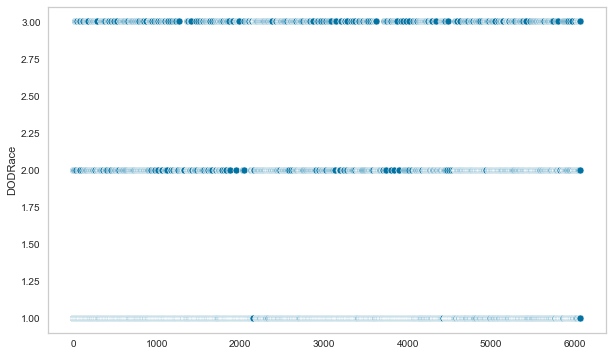

In [34]:
sns.scatterplot(data=df.DODRace)#ayrılabilir data mı diye baktık(lineer olup olmadığını görmek için ama işe yaramıyor

In [35]:
df.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
abdominalextensiondepthsitting,1.00,0.35,0.31,0.52,0.28,0.46,0.33,0.42,0.69,0.51,0.72,0.37,0.53,0.63,0.52,0.74,0.84,0.25,0.48,0.32,0.66,0.34,0.63,0.83,0.78,0.30,0.19,0.46,0.20,0.24,0.40,0.14,0.26,0.28,0.44,0.35,0.35,0.63,0.73,0.31,0.42,0.42,0.46,0.30,0.36,0.36,0.33,0.50,0.44,0.60,0.55,0.26,0.26,0.60,0.54,0.28,0.35,0.22,0.35,0.67,0.29,0.66,0.63,0.32,0.31,0.15,0.28,0.64,0.29,0.19,0.27,0.42,0.28,0.32,0.31,0.35,0.29,0.73,0.72,0.39,0.26,0.19,0.23,0.73,0.57,0.86,0.94,0.96,0.58,0.15,0.83,0.55,0.38,-0.03,0.39
acromialheight,0.35,1.00,0.87,0.50,0.99,0.69,0.80,0.73,0.52,0.40,0.63,0.71,0.57,0.58,0.51,0.28,0.34,0.87,0.81,0.75,0.41,0.98,0.54,0.53,0.28,0.96,0.90,0.34,0.41,0.36,0.44,0.28,0.29,0.81,0.67,0.83,0.85,0.64,0.57,0.86,0.89,0.71,0.72,0.75,0.41,0.43,0.55,0.80,0.45,0.21,0.10,0.93,0.34,0.53,0.59,0.90,0.93,0.86,0.68,0.33,0.54,0.63,0.65,0.87,0.71,0.89,0.82,0.69,0.89,0.54,0.82,0.87,0.88,0.88,0.98,0.98,0.95,0.28,0.45,0.80,0.89,0.33,0.88,0.73,0.73,0.44,0.41,0.36,0.61,0.93,0.68,0.73,0.92,-0.22,0.08
acromionradialelength,0.31,0.87,1.00,0.42,0.86,0.60,0.73,0.67,0.45,0.34,0.56,0.61,0.52,0.51,0.46,0.25,0.29,0.81,0.78,0.74,0.35,0.87,0.47,0.47,0.27,0.84,0.85,0.25,0.31,0.31,0.37,0.23,-0.00,0.64,0.59,0.75,0.82,0.56,0.50,0.84,0.82,0.62,0.63,0.72,0.35,0.39,0.48,0.71,0.44,0.18,0.08,0.86,0.34,0.47,0.54,0.83,0.86,0.81,0.55,0.28,0.47,0.55,0.57,0.79,0.67,0.83,0.80,0.62,0.97,0.51,0.65,0.87,0.94,0.89,0.86,0.86,0.85,0.24,0.38,0.80,0.83,0.29,0.83,0.58,0.61,0.37,0.35,0.33,0.48,0.85,0.60,0.64,0.68,-0.16,0.08
anklecircumference,0.52,0.50,0.42,1.00,0.46,0.71,0.56,0.54,0.64,0.45,0.64,0.69,0.52,0.53,0.50,0.57,0.58,0.36,0.50,0.33,0.82,0.51,0.56,0.61,0.49,0.48,0.38,0.46,0.38,0.22,0.37,0.24,0.31,0.51,0.65,0.58,0.45,0.66,0.61,0.45,0.51,0.57,0.61,0.45,0.40,0.43,0.43,0.73,0.53,0.46,0.41,0.42,0.24,0.51,0.52,0.41,0.51,0.38,0.49,0.70,0.40,0.57,0.58,0.50,0.45,0.35,0.39,0.63,0.42,0.35,0.52,0.54,0.41,0.46,0.51,0.52,0.44,0.59,0.65,0.46,0.40,0.30,0.37,0.67,0.51,0.59,0.56,0.51,0.48,0.41,0.74,0.70,0.51,-0.16,-0.03
axillaheight,0.28,0.99,0.86,0.46,1.00,0.66,0.79,0.71,0.46,0.36,0.56,0.68,0.53,0.52,0.45,0.23,0.28,0.88,0.81,0.76,0.36,0.98,0.47,0.45,0.22,0.96,0.92,0.31,0.40,0.34,0.40,0.26,0.24,0.79,0.64,0.82,0.85,0.58,0.50,0.87,0.89,0.67,0.67,0.76,0.37,0.41,0.53,0.77,0.42,0.17,0.07,0.95,0.33,0.47,0.55,0.90,0.93,0.87,0.65,0.28,0.51,0.56,0.59,0.86,0.70,0.91,

In [36]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (59, 59)


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bideltoidbreadth,buttockcircumference,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestcircumference,chestheight,crotchheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,hipbreadth,hipbreadthsitting,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,neckcircumference,neckcircumferencebase,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,tibialheight,trochanterionheight,verticaltrunkcircumferenceusa,waistbreadth,waistcircumference,waistdepth,waistheightomphalion,weightkg,wristcircumference,wristheight
abdominalextensiondepthsitting,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.939645,0.958716,nan,nan,nan,nan
acromialheight,nan,nan,nan,0.987115,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.983955,nan,0.959300,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.932232,nan,nan,nan,0.931762,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.979925,0.984711,0.945019,nan,nan,nan,nan,nan,nan,nan,0.930954,nan,nan,0.921268
acromionradialelength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.967500,nan,nan,0.939807,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
axillaheight,nan,0.987115,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.976609,nan,0.956096,0.915316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.946228,nan,nan,0.903028,0.933482,nan,nan,nan,0.905677,nan,nan,nan,nan,nan,nan,nan,0.975436,0.980594,0.954317,nan,0.904542,nan,nan,nan,nan,nan,0.946468,nan,nan,0.903063
balloffootcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.922957,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
balloffootlength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.959326,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
biacromialbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.900032,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bicepscircumferenceflexed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.912778,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bideltoidbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.928047,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.947405,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.906437,nan,nan
buttockcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.923805,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.937563,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [37]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [38]:
#birbiri ile korele olan sutunlar
df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr')

,,Corr
abdominalextensiondepthsitting,abdominalextensiondepthsitting,1.00
cervicaleheight,stature,0.99
stature,suprasternaleheight,0.99
cervicaleheight,suprasternaleheight,0.99
acromialheight,axillaheight,0.99
...,...,...
elbowrestheight,lateralfemoralepicondyleheight,0.00
buttockdepth,DODRace,-0.00
buttockheight,elbowrestheight,-0.00
thighclearance,DODRace,-0.00


In [39]:
df.corr().unstack().drop_duplicates()

abdominalextensiondepthsitting  abdominalextensiondepthsitting    1.00
                                acromialheight                    0.35
                                acromionradialelength             0.31
                                anklecircumference                0.52
                                axillaheight                      0.28
                                                                  ... 
wristcircumference              DODRace                          -0.17
                                Age                               0.15
wristheight                     DODRace                          -0.27
                                Age                               0.11
DODRace                         Age                               0.01
Length: 4466, dtype: float64

In [40]:

df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr').head(20)

Corr
abdominalextensiondepthsitting abdominalextensiondepthsitting  1.00
cervicaleheight                stature                         0.99
stature                        suprasternaleheight             0.99
cervicaleheight                suprasternaleheight             0.99
acromialheight                 axillaheight                    0.99
                               suprasternaleheight             0.98
                               cervicaleheight                 0.98
eyeheightsitting               sittingheight                   0.98
axillaheight                   suprasternaleheight             0.98
acromialheight                 stature                         0.98
axillaheight                   cervicaleheight                 0.98
                               stature                         0.98
neckcircumference              neckcircumferencebase           0.97
acromionradialelength          shoulderelbowlength             0.97
chestheight                    suprasternaleheight             0.97
cervicaleheight                chestheight                     0.97
buttockheight                  trochanterionheight             0.97
chestheight                    stature                         0.96
iliocristaleheight             tenthribheight                  0.96
forearmcenterofgriplength      forearmhandlength               0.96

In [41]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .7)

chestbreadth                    waistcircumference               0.70
palmlength                      functionalleglength              0.70
heelanklecircumference          trochanterionheight              0.70
bideltoidbreadth                buttockdepth                     0.70
kneeheightsitting               bimalleolarbreadth               0.70
                                                                 ... 
acromialheight                  axillaheight                     0.99
cervicaleheight                 suprasternaleheight              0.99
stature                         suprasternaleheight              0.99
cervicaleheight                 stature                          0.99
abdominalextensiondepthsitting  abdominalextensiondepthsitting    NaN
Length: 1020, dtype: float64

<AxesSubplot:>

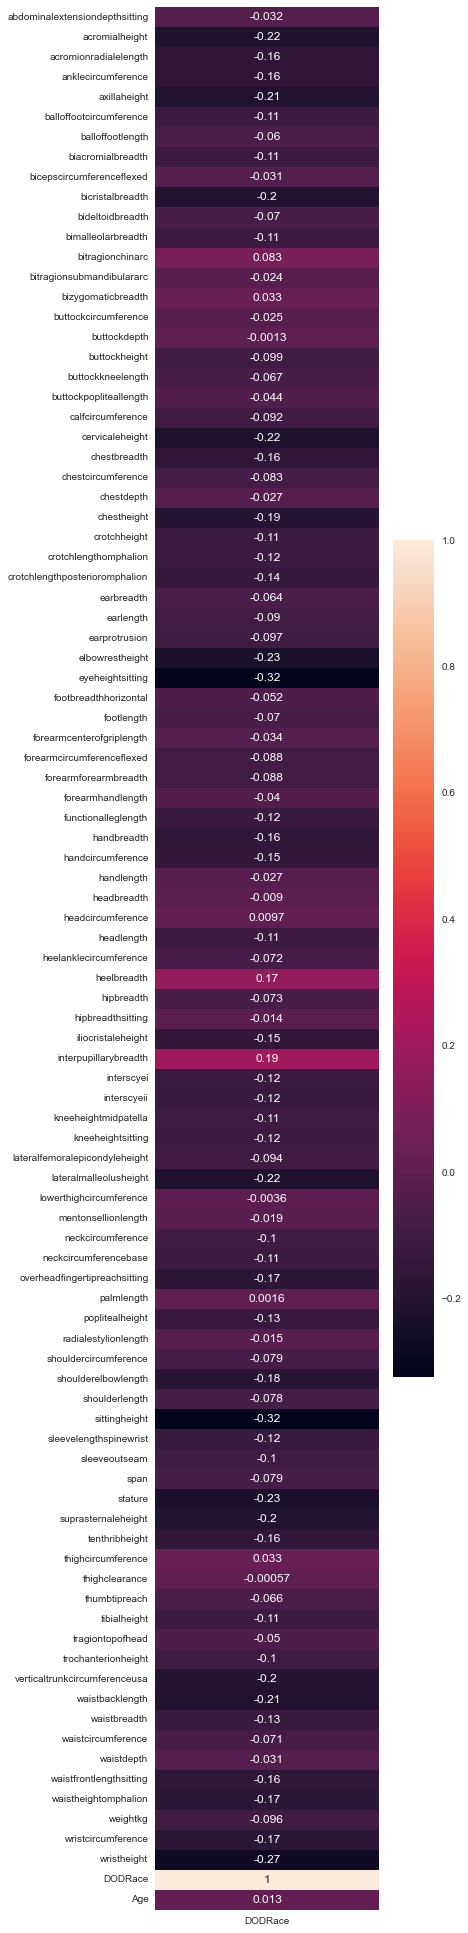

In [42]:
plt.figure(figsize=(5,35))
corr = df.corr()[['DODRace']]
sns.heatmap(corr, annot=True)

In [43]:
df_numeric = df.select_dtypes('number')
df_object = df.select_dtypes('O')

df_numeric.shape, df_object.shape

((5769, 95), (5769, 4))

In [44]:
# #histplot için:
# fig = df_numeric.hist(
# figsize=(16, 50), layout=(int(np.ceil(len(df_numeric.columns)/4)), 4),
# bins=50, color="darkcyan", 
# edgecolor="black", 
# xlabelsize=14, ylabelsize=14, 
# alpha=0.5, xrot=45
# )
# plt.tight_layout()
# plt.show()

In [45]:
# fig = plt.figure(figsize=(15,50))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.2
# )
# for i, col in enumerate(df_numeric.columns):
#     plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
#     sns.regplot(x=col, y="DODRace", data=df_numeric, scatter_kws={"s": 18})

In [46]:
# fig = plt.figure(figsize=(15, 30))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.15
# )
# for i, col in enumerate(df_numeric.columns):
#     plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
#     sns.boxplot(y=col, data=df_numeric)

In [47]:
# fig, axes = plt.subplots(int(np.ceil(len(df_object.columns)/3)), 3, figsize=(15, 15))

# for i, ax in enumerate(fig.axes):
#     # plot barplot of each feature skip target
#     if i < len(df_object.columns) - 1:
#         ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
#         g = sns.countplot(x=df_object.columns[i], alpha=0.7, data=df_object, ax=ax, palette = "Set1")
#         g.bar_label(g.containers[0])
# fig.tight_layout()

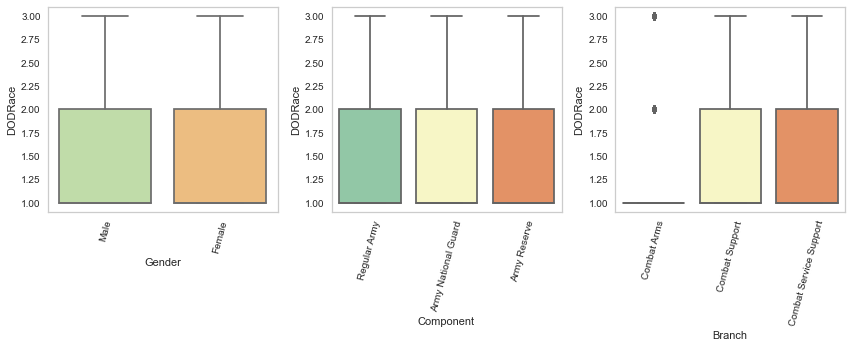

In [48]:
df_object=df.select_dtypes(include="O")
fig, axes = plt.subplots(1,3, figsize=(12, 5))
for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature skip target
    if i < len(df_object.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_object.columns[i], y=df["DODRace"], data=df_object, ax=ax, palette="Spectral_r")
fig.tight_layout()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [49]:
#dummy yapmama sebebimiz :taninmayan degerde fail veriyor, onehot ignore ediyor.

## Train-Test split

In [50]:
df.shape

(5769, 99)

In [51]:
X=df.drop(columns="DODRace")
y=df["DODRace"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)# stratify=y,targetta  "y" eşit dağılım sergilemesi için

In [53]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4615, 98), (1154, 98), (4615,), (1154,))

## OneHotEncoding Operations

In [54]:
from sklearn.preprocessing import OneHotEncoder

### OneHotEncoder for X_train and X_test

In [55]:
def trans_2_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

In [56]:
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)
X_train.shape, X_test.shape

((4615, 105), (1154, 105))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [57]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

In [58]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train);

## 1. Logistic model

### Vanilla Logistic Model

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [60]:
scaler=MinMaxScaler() # dummy sütunlar old. için minmax seçildi
log_model= LogisticRegression(class_weight="balanced",random_state=42)

In [61]:
process = [("scaler", scaler),("log_model", log_model)]
log_pipe_model = Pipeline(steps=process)

In [62]:
log_pipe_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log_model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [63]:
y_pred_test=log_pipe_model.predict(X_test)
y_pred_train=log_pipe_model.predict(X_train)

In [64]:
log_accuracy_test = accuracy_score(y_test, y_pred_test)
log_accuracy_train = accuracy_score(y_train, y_pred_train)

log_f1_test = f1_score(y_test, y_pred_test, average='weighted')
log_f1_train = f1_score(y_train, y_pred_train, average='weighted')

log_accuracy_test, log_accuracy_train, log_f1_test, log_f1_train

(0.7998266897746967, 0.8242686890574215, 0.819459498536687, 0.8410654611283938)

In [65]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train);

TEST REPORT
              precision    recall  f1-score   support

           1       0.93      0.80      0.86       758
           2       0.90      0.88      0.89       260
           3       0.36      0.67      0.47       136

    accuracy                           0.80      1154
   macro avg       0.73      0.78      0.74      1154
weighted avg       0.86      0.80      0.82      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.95      0.81      0.88      3034
           2       0.91      0.91      0.91      1038
           3       0.40      0.73      0.52       543

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.88      0.82      0.84      4615



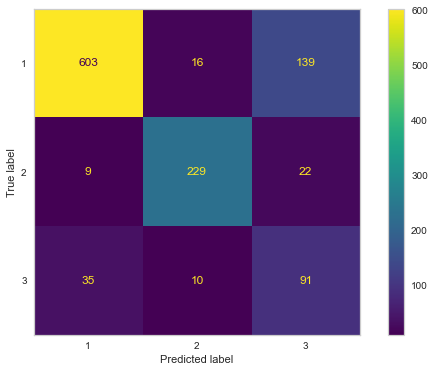

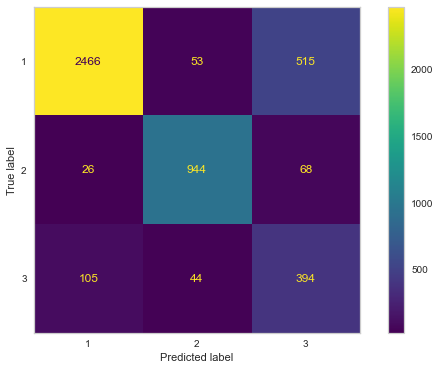

In [66]:
eval_metric(log_pipe_model,X_train,y_train,X_test,y_test)

### Cross Validate

In [67]:
model = Pipeline(process)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores
df_scores.mean()[2:]

test_accuracy             0.81
test_precision_weighted   0.87
test_recall_weighted      0.81
test_f1_weighted          0.83
dtype: float64

### Logistic Model GridsearchCV

In [68]:
model = Pipeline(process)# reset the pipe model

penalty = ["l1", "l2", "elasticnet"]
C = np.linspace(-1, 5, 20)      
class_weight= ["balanced", None] 
param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__class_weight" : class_weight}

log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="f1_macro", cv=5, n_jobs=-1) 
#scoring: güçlendirmek istediğimiz grup için (datanın balance veya imbalance durumuna göre )

In [69]:
log_pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('log_model', LogisticRegression(class_weight='balanced', random_state=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'log_model': LogisticRegression(class_weight='balanced', random_state=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'log_model__C': 1.0,
 'log_model__class_weight': 'balanced',
 'log_model__dual': False,
 'log_model__fit_intercept': True,
 'log_model__intercept_scaling': 1,
 'log_model__l1_ratio': None,
 'log_model__max_iter': 100,
 'log_model__multi_class': 'auto',
 'log_model__n_jobs': None,
 'log_model__penalty': 'l2',
 'log_model__random_state': 42,
 'log_model__solver': 'lbfgs',
 'log_model__tol': 0.0001,
 'log_model__verbose': 0,
 'log_model__warm_start': False}

In [70]:
# fit grid model on train data

log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([-1.        , -0.68421053, -0.36842105, -0.05263158,  0.26315789,
        0.57894737,  0.89473684,  1.21052632,  1.52631579,  1.84210526,
        2.15789474,  2.47368421,  2.78947368,  3.10526316,  3.42105263,
        3.73684211,  4.05263158,  4.36842105,  4.68421053,  5.        ]),
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_macro')

In [71]:
log_grid_model.best_params_

{'log_model__C': 4.368421052631579,
 'log_model__class_weight': None,
 'log_model__penalty': 'l2'}

In [72]:
y_pred_test = log_grid_model.predict(X_test)
y_pred_train = log_grid_model.predict(X_train)

In [73]:
log_accuracy_test = accuracy_score(y_test, y_pred_test)
log_accuracy_train = accuracy_score(y_train, y_pred_train)

log_f1_test = f1_score(y_test, y_pred_test, average='weighted')
log_f1_train = f1_score(y_train, y_pred_train, average='weighted')

log_accuracy_test, log_accuracy_train, log_f1_test, log_f1_train

(0.8717504332755632,
 0.8823401950162514,
 0.8610699413953422,
 0.8712100503693554)

TEST REPORT
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       758
           2       0.89      0.90      0.90       260
           3       0.63      0.38      0.47       136

    accuracy                           0.87      1154
   macro avg       0.80      0.74      0.76      1154
weighted avg       0.86      0.87      0.86      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.89      0.96      0.93      3034
           2       0.91      0.91      0.91      1038
           3       0.68      0.38      0.49       543

    accuracy                           0.88      4615
   macro avg       0.83      0.75      0.78      4615
weighted avg       0.87      0.88      0.87      4615



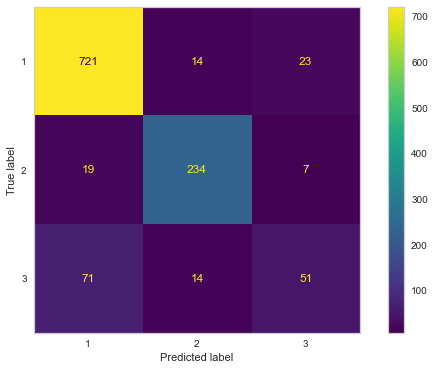

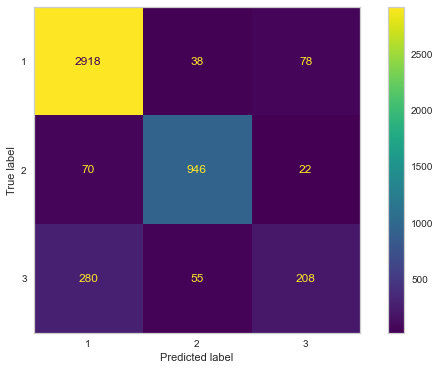

In [74]:
eval_metric(log_grid_model,X_train,y_train,X_test,y_test)

In [75]:
# from yellowbrick.classifier import ClassificationReport
# visualizer = ClassificationReport(log_grid_model, support=True)
# visualizer.fit(X_train, y_train)        
# visualizer.score(X_test, y_test)        
# visualizer.show()

### Evaluating ROC Curves and AUC

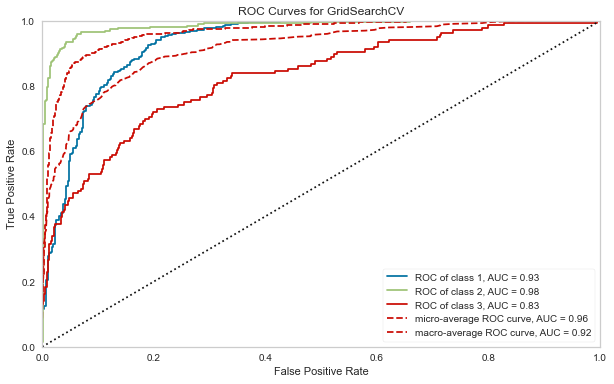

In [76]:
# for grid model with best hyperparameters

from yellowbrick.classifier import ROCAUC
model = log_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

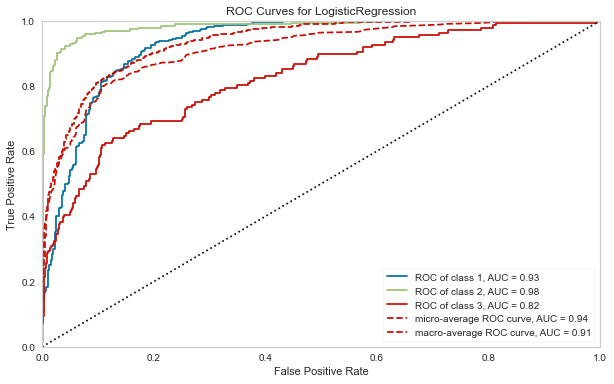

In [77]:
# for pipe model with default hyperparameters

from yellowbrick.classifier import ROCAUC
model = log_pipe_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

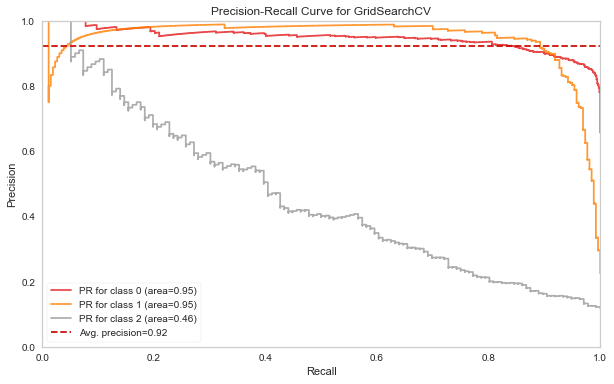

In [78]:
# precision-recall curve for grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = log_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test               , y_test)
viz.show();

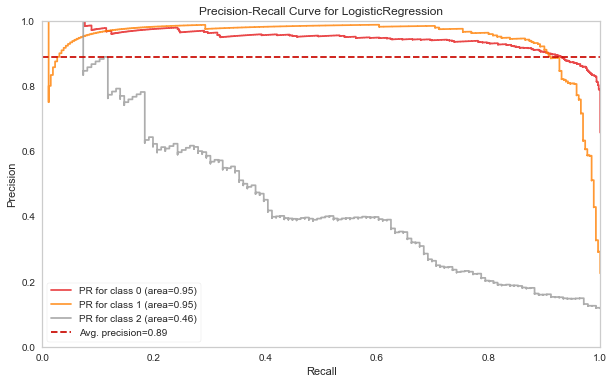

In [79]:
# precision-recall curve for log_pipe model

from yellowbrick.classifier import PrecisionRecallCurve

model = log_pipe_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## 2. SVC

### Vanilla SVC model 

In [80]:
svc_model = SVC(class_weight="balanced",random_state=42)
process = [("scaler", scaler),("svc_model", svc_model)]
svc_pipe_model = Pipeline(steps=process)

In [81]:
svc_pipe_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc_model', SVC(class_weight='balanced', random_state=42))])

In [82]:
y_pred_test=svc_pipe_model.predict(X_test)
y_pred_train=svc_pipe_model.predict(X_train)

In [83]:
svc_accuracy_test = accuracy_score(y_test, y_pred_test)
svc_accuracy_train = accuracy_score(y_train, y_pred_train)

svc_f1_test = f1_score(y_test, y_pred_test, average='weighted')
svc_f1_train = f1_score(y_train, y_pred_train, average='weighted')

svc_accuracy_test,svc_accuracy_train, svc_f1_test, svc_f1_train

(0.7842287694974004, 0.856771397616468, 0.8039644626182758, 0.8687503562189041)

TEST REPORT
              precision    recall  f1-score   support

           1       0.92      0.78      0.84       758
           2       0.88      0.90      0.89       260
           3       0.34      0.62      0.44       136

    accuracy                           0.78      1154
   macro avg       0.71      0.76      0.72      1154
weighted avg       0.84      0.78      0.80      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.96      0.84      0.90      3034
           2       0.93      0.94      0.93      1038
           3       0.48      0.80      0.60       543

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



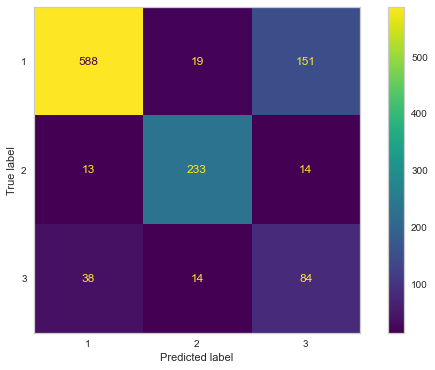

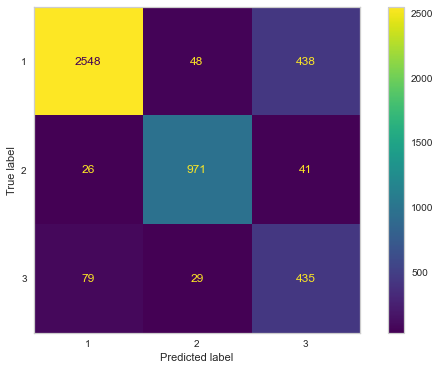

In [84]:
eval_metric(svc_pipe_model, X_train, y_train, X_test, y_test)

### Cross Validate

In [85]:
model = Pipeline(process)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.81
test_precision_weighted   0.86
test_recall_weighted      0.81
test_f1_weighted          0.83
dtype: float64

###  SVC Model GridsearchCV

In [86]:
process = [("scaler", scaler),("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
model = Pipeline(process) # reset the pipe model

param_grid = {'SVC__C': [0.001, 0.01, 0.1],
              'SVC__gamma': ["scale","auto"],
              'SVC__kernel': ['poly',"rbf"],
              "SVC__degree" : [1,2,3]}

svc_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="f1_weighted", cv=5, n_jobs=-1)

In [87]:
svc_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.01, 0.1], 'SVC__degree': [1, 2, 3],
                         'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['poly', 'rbf']},
             scoring='f1_weighted')

In [88]:
svc_grid_model.best_params_

{'SVC__C': 0.1, 'SVC__degree': 3, 'SVC__gamma': 'scale', 'SVC__kernel': 'poly'}

In [89]:
y_pred_test = svc_grid_model.predict(X_test)
y_pred_train = svc_grid_model.predict(X_train)

In [90]:
SVC_accuracy_test = accuracy_score(y_test, y_pred_test)
SVC_accuracy_train = accuracy_score(y_train, y_pred_train)

SVC_f1_test = f1_score(y_test, y_pred_test, average='weighted')
SVC_f1_train = f1_score(y_train, y_pred_train, average='weighted')

SVC_accuracy_test, SVC_accuracy_train, SVC_f1_test, SVC_f1_train

(0.7850953206239168,
 0.8485373781148429,
 0.8086387421250942,
 0.8633658624374626)

TEST REPORT
              precision    recall  f1-score   support

           1       0.93      0.77      0.84       758
           2       0.92      0.89      0.91       260
           3       0.33      0.66      0.44       136

    accuracy                           0.79      1154
   macro avg       0.73      0.77      0.73      1154
weighted avg       0.85      0.79      0.81      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.97      0.82      0.89      3034
           2       0.94      0.93      0.93      1038
           3       0.46      0.84      0.59       543

    accuracy                           0.85      4615
   macro avg       0.79      0.86      0.80      4615
weighted avg       0.90      0.85      0.86      4615



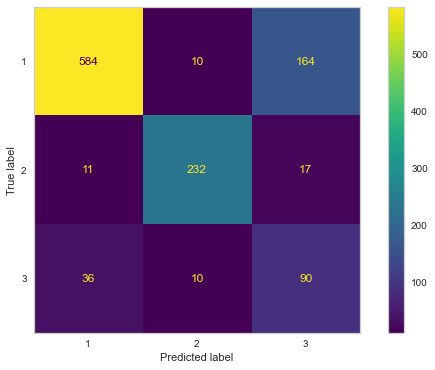

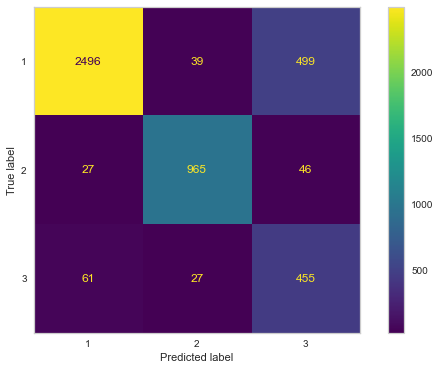

In [91]:
eval_metric(svc_grid_model,X_train,y_train,X_test, y_test)

### Evaluating ROC Curves and AUC

In [92]:
# # for svc grid model with best hyperparameters

# from yellowbrick.classifier import ROCAUC
# model = svc_grid_model
# visualizer = ROCAUC(model)

# visualizer.fit(X_train, y_train)        
# visualizer.score(X_test, y_test)        
# visualizer.show(); 

In [93]:
# # for svc_pipe_model with default hyperparameters

# from yellowbrick.classifier import ROCAUC
# model = svc_pipe_model
# visualizer = ROCAUC(model)

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show(); 

In [94]:
# # precision-recall curve for svc grid model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = svc_grid_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

In [95]:
# # precision-recall curve for svc pipe model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = svc_pipe_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

## 3. DT

In [96]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [98]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object')

In [99]:
from sklearn.compose import make_column_transformer
# make_column_transformer transform işlemlerinin gerşekleştirilmesi için

from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # bilmediği bir veri gelirse -1 vermesi için
# handle_unknown='use_encoded_value' bilinmeyen bir veri geldiğinde encoded değeri kullanması için
# unknown_value=-1 bilinmeyen bir veri geldiğinde kullanılacak encode değeri

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')
# remainder='passthrough' kalan feature ların pass geçilmesi için

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=42))]

DT_pipe_model = Pipeline(steps=operations)

DT_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=42))])

In [101]:
y_pred_test=DT_pipe_model.predict(X_test)
y_pred_train=DT_pipe_model.predict(X_train)

In [102]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='weighted')
DT_f1_train = f1_score(y_train, y_pred_train, average='weighted')

DT_accuracy_test, DT_accuracy_train, DT_f1_test, DT_f1_train

(0.7019064124783362, 1.0, 0.7060256825991841, 1.0)

TEST REPORT
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       758
           2       0.66      0.67      0.67       260
           3       0.22      0.25      0.24       136

    accuracy                           0.70      1154
   macro avg       0.57      0.57      0.57      1154
weighted avg       0.71      0.70      0.71      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



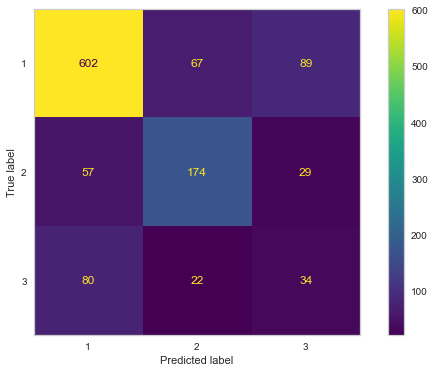

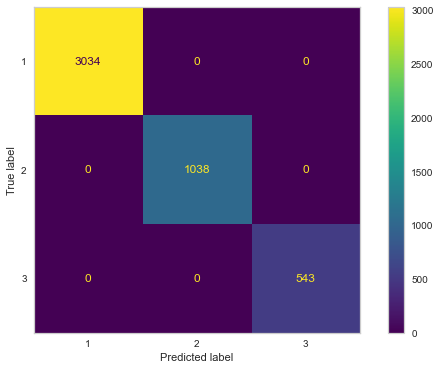

In [103]:
eval_metric(DT_pipe_model, X_train, y_train, X_test, y_test)

### Cros Validate

In [104]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.69
test_precision_weighted   0.69
test_recall_weighted      0.69
test_f1_weighted          0.69
dtype: float64

### DT Model GridSearch

In [105]:
# reset the model
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=42))]
model = Pipeline(steps=operations)

# define the hyperparameters to be used in grid search
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 10, 50],
              "DT_model__max_depth": [None, 2, 5, 10],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5]}


In [106]:
DT_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="f1_weighted",
                          cv=10,
                          n_jobs = -1)

In [107]:
DT_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 5, 10],
                         'DT_model__max_features': [None, 'auto', 'log2', 10,
                                                    50],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5],
                         'DT_model__splitter': ['best', 'random']},
             scoring='f1_weighted')

In [108]:
DT_grid_model.best_score_

0.7315524823345287

In [109]:
DT_grid_model.best_params_

{'DT_model__max_depth': 10,
 'DT_model__max_features': 50,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 5,
 'DT_model__splitter': 'best'}

In [110]:
DT_grid_model.best_estimator_ # default'da olmayan değerleri getirir

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=10, max_features=50,
                                        min_samples_split=5,
                                        random_state=42))])

In [111]:
y_pred_test = DT_grid_model.predict(X_test)
y_pred_train = DT_grid_model.predict(X_train)

In [112]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='weighted')
DT_f1_train = f1_score(y_train, y_pred_train, average='weighted')

DT_accuracy_test, DT_accuracy_train, DT_f1_test, DT_f1_train

(0.7305025996533796,
 0.9157096424702058,
 0.7179340589099316,
 0.9101208007289531)

TEST REPORT
              precision    recall  f1-score   support

           1       0.80      0.86      0.83       758
           2       0.69      0.64      0.67       260
           3       0.26      0.18      0.21       136

    accuracy                           0.73      1154
   macro avg       0.58      0.56      0.57      1154
weighted avg       0.71      0.73      0.72      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.90      0.99      0.94      3034
           2       0.96      0.89      0.92      1038
           3       0.91      0.57      0.70       543

    accuracy                           0.92      4615
   macro avg       0.92      0.81      0.86      4615
weighted avg       0.92      0.92      0.91      4615



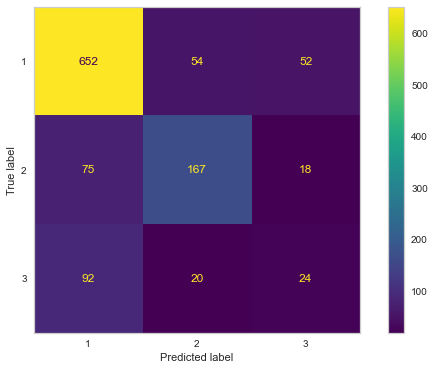

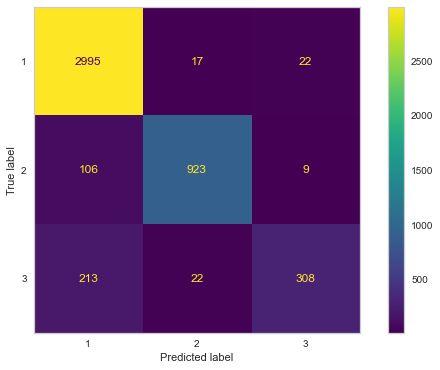

In [113]:
eval_metric(DT_grid_model, X_train, y_train, X_test, y_test)

### DT with Bagging

In [114]:
from sklearn.ensemble import BaggingClassifier

operations = [("OrdinalEncoder", column_trans), ("Bag_DT_model", BaggingClassifier(DecisionTreeClassifier(random_state=42), n_jobs=-1, n_estimators=10))]

Bag_DT_pipe_model = Pipeline(steps=operations)

Bag_DT_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('Bag_DT_model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                   n_jobs=-1))])

In [115]:
y_pred_test=Bag_DT_pipe_model.predict(X_test)
y_pred_train=Bag_DT_pipe_model.predict(X_train)

In [116]:
Bag_DT_accuracy_test = accuracy_score(y_test, y_pred_test)
Bag_DT_accuracy_train = accuracy_score(y_train, y_pred_train)

Bag_DT_f1_test = f1_score(y_test, y_pred_test, average='weighted')
Bag_DT_f1_train = f1_score(y_train, y_pred_train, average='weighted')

Bag_DT_accuracy_test,Bag_DT_accuracy_train, Bag_DT_f1_test, Bag_DT_f1_train

(0.7859618717504333,
 0.9798483206933911,
 0.7526667827140202,
 0.9794377183486268)

TEST REPORT
              precision    recall  f1-score   support

           1       0.80      0.94      0.86       758
           2       0.81      0.71      0.76       260
           3       0.31      0.08      0.13       136

    accuracy                           0.79      1154
   macro avg       0.64      0.58      0.58      1154
weighted avg       0.74      0.79      0.75      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.97      1.00      0.99      3034
           2       0.99      0.98      0.99      1038
           3       1.00      0.87      0.93       543

    accuracy                           0.98      4615
   macro avg       0.99      0.95      0.97      4615
weighted avg       0.98      0.98      0.98      4615



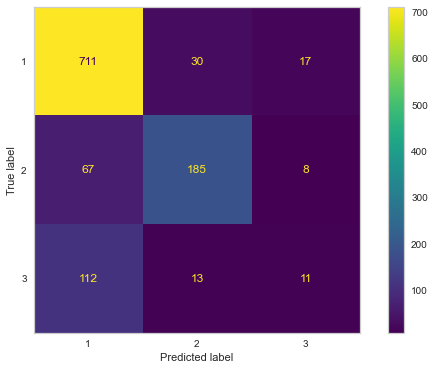

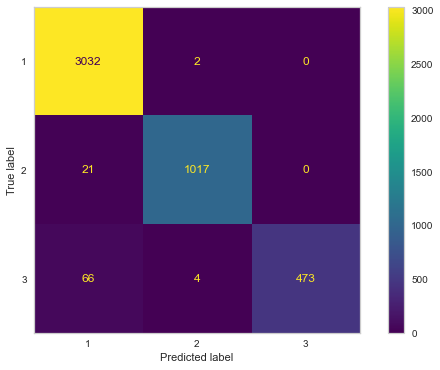

In [117]:
eval_metric(Bag_DT_pipe_model, X_train, y_train, X_test, y_test)

### Cros Validate

In [118]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy             0.80
test_precision_weighted   0.76
test_recall_weighted      0.80
test_f1_weighted          0.77
dtype: float64

### Bag_DT for Grid Search  

In [119]:
operations = [("OrdinalEncoder", column_trans), ("Bag_DT_model", BaggingClassifier(DecisionTreeClassifier(random_state=42), n_jobs=-1))]

model = Pipeline(steps=operations)

param_grid = {"Bag_DT_model__max_features":[10, 50, 70, 95],
              "Bag_DT_model__n_estimators": [10, 50, 100],
              "Bag_DT_model__max_samples": [0.5, 1]}
              

In [120]:
Bag_DT_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="f1_weighted", #grid search de tek değer verebiliyoruz
                          cv=5,
                          n_jobs = -1)

In [121]:
Bag_DT_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                                       ('Bag_DT_model',
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                          n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'Bag_DT_model__max_features': [10, 50, 70, 95],
                         'Bag_DT_model__max_samples': [0.5, 1],
                         'Bag_DT_model__n_estimators': [10, 50, 100]},
             scoring='f1_weighted')

In [122]:
Bag_DT_grid_model.best_score_

0.7791550017153498

In [123]:
Bag_DT_grid_model.best_params_

{'Bag_DT_model__max_features': 95,
 'Bag_DT_model__max_samples': 0.5,
 'Bag_DT_model__n_estimators': 100}

In [124]:
y_pred_test = Bag_DT_grid_model.predict(X_test)
y_pred_train = Bag_DT_grid_model.predict(X_train)

In [125]:
Bag_DT_accuracy_test = accuracy_score(y_test, y_pred_test)
Bag_DT_accuracy_train = accuracy_score(y_train, y_pred_train)

Bag_DT_f1_test = f1_score(y_test, y_pred_test, average='weighted')
Bag_DT_f1_train = f1_score(y_train, y_pred_train, average='weighted')

Bag_DT_accuracy_test, Bag_DT_accuracy_train, Bag_DT_f1_test, Bag_DT_f1_train

(0.8275563258232236, 0.9638136511375948, 0.7923332749219196, 0.962276936090882)

TEST REPORT
              precision    recall  f1-score   support

           1       0.82      0.97      0.89       758
           2       0.85      0.80      0.82       260
           3       0.71      0.11      0.19       136

    accuracy                           0.83      1154
   macro avg       0.80      0.63      0.63      1154
weighted avg       0.82      0.83      0.79      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.95      1.00      0.97      3034
           2       0.99      0.97      0.98      1038
           3       1.00      0.76      0.86       543

    accuracy                           0.96      4615
   macro avg       0.98      0.91      0.94      4615
weighted avg       0.97      0.96      0.96      4615



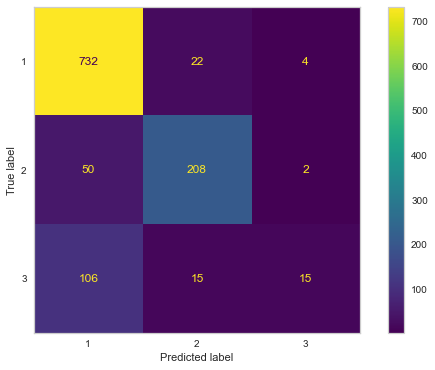

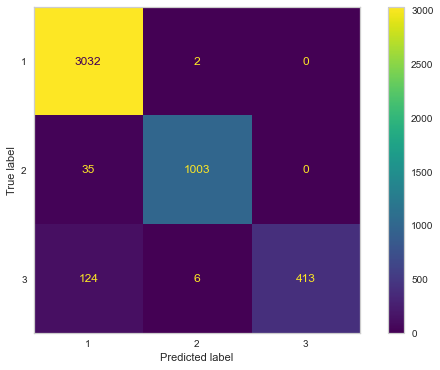

In [126]:
eval_metric(Bag_DT_grid_model, X_train, y_train, X_test, y_test)

### Evaluating ROC Curves and AUC

In [127]:
#  Bag_DT_pipe_model 

# from yellowbrick.classifier import ROCAUC
# model = Bag_DT_pipe_model
# visualizer = ROCAUC(model)

# visualizer.fit(X_train, y_train)        
# visualizer.score(X_test, y_test)        
# visualizer.show(); 

In [128]:
# Bag_DT_grid_model 

# from yellowbrick.classifier import ROCAUC
# model = Bag_DT_grid_model
# visualizer = ROCAUC(model)

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show();

In [129]:
# # precision-recall curve for Bag_DT_grid_model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = Bag_DT_grid_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

In [130]:
# # precision-recall curve for svc pipe model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = Bag_DT_pipe_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

## 3. RF

### Vanilla RF Model

In [131]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [132]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=42))]

RF_pipe_model = Pipeline(steps=operations)

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(random_state=42))])

In [133]:
y_pred_test=RF_pipe_model.predict(X_test)
y_pred_train=RF_pipe_model.predict(X_train)

In [134]:
RF_accuracy_test = accuracy_score(y_test, y_pred_test)
RF_accuracy_train = accuracy_score(y_train, y_pred_train)

RF_f1_test = f1_score(y_test, y_pred_test, average='weighted')
RF_f1_train = f1_score(y_train, y_pred_train, average='weighted')

RF_accuracy_test,RF_accuracy_train, RF_f1_test, RF_f1_train

(0.8180242634315424, 1.0, 0.7800400653301159, 1.0)

TEST REPORT
              precision    recall  f1-score   support

           1       0.81      0.97      0.88       758
           2       0.88      0.75      0.81       260
           3       0.63      0.09      0.15       136

    accuracy                           0.82      1154
   macro avg       0.77      0.60      0.62      1154
weighted avg       0.80      0.82      0.78      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



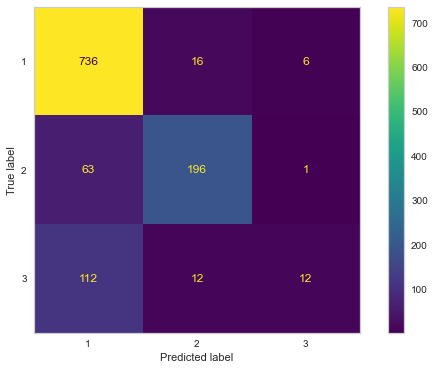

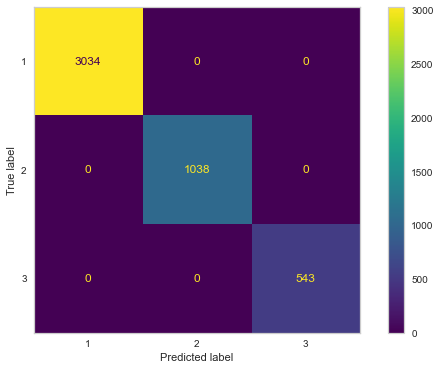

In [135]:
eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

###  Cross validation

In [136]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.82
test_precision_weighted   0.80
test_recall_weighted      0.82
test_f1_weighted          0.77
dtype: float64

### RF Model GridsearchCV

In [137]:
#grid search
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=42))]
model = Pipeline(steps=operations)

param_grid = {"RF_model__n_estimators":[10, 30, 50],
             "RF_model__criterion":["entropy","gini"],
              "RF_model__max_features":['auto',"log2", 10, 20],
              "RF_model__max_depth": [10, 15],
             "RF_model__min_samples_split": [2, 5, 10],
             "RF_model__min_samples_leaf" : [1, 5]}


In [140]:
RF_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_weighted',
                          cv=5,
                          n_jobs = -1)

In [141]:

RF_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['entropy', 'gini'],
                         'RF_model__max_depth': [10, 15],
                         'RF_model__max_features': ['auto', 'log2', 10, 20],
                         'RF_model__min_samples_leaf': [1, 5],
                         'RF_model__min_samples_split': [2, 5, 10],
                         'RF_model__n_estimators': [10, 30, 50]},
             scoring='f1_weighted')

In [142]:
RF_grid_model.best_score_

0.778875061375804

In [143]:
RF_grid_model.best_params_

{'RF_model__criterion': 'gini',
 'RF_model__max_depth': 15,
 'RF_model__max_features': 20,
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 5,
 'RF_model__n_estimators': 30}

In [144]:
RF_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(max_depth=15, max_features=20,
                                        min_samples_split=5, n_estimators=30,
                                        random_state=42))])

In [145]:
y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

In [146]:
RF_accuracy_test = accuracy_score(y_test, y_pred_test)
RF_accuracy_train = accuracy_score(y_train, y_pred_train)

RF_f1_test = f1_score(y_test, y_pred_test, average='weighted')
RF_f1_train = f1_score(y_train, y_pred_train, average='weighted')

RF_accuracy_test, RF_accuracy_train, RF_f1_test, RF_f1_train

(0.8119584055459272,
 0.9696641386782232,
 0.7729808984646117,
 0.9684629276278941)

TEST REPORT
              precision    recall  f1-score   support

           1       0.81      0.96      0.88       758
           2       0.84      0.77      0.80       260
           3       0.56      0.07      0.13       136

    accuracy                           0.81      1154
   macro avg       0.73      0.60      0.60      1154
weighted avg       0.79      0.81      0.77      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.96      1.00      0.98      3034
           2       1.00      0.98      0.99      1038
           3       1.00      0.79      0.88       543

    accuracy                           0.97      4615
   macro avg       0.98      0.92      0.95      4615
weighted avg       0.97      0.97      0.97      4615



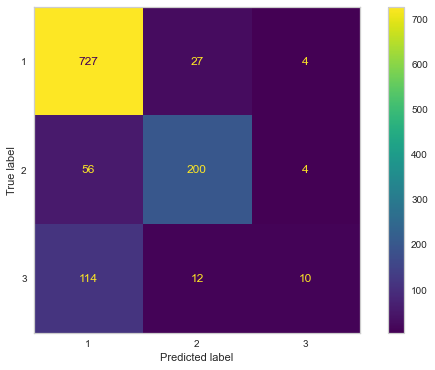

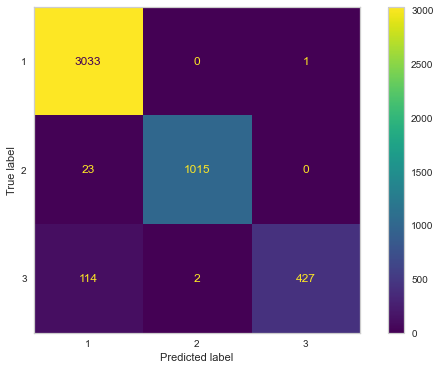

In [147]:
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

### Evaluating ROC Curves and AUC

In [ ]:
# # for RF_grid_modell

# from yellowbrick.classifier import ROCAUC
# model = RF_grid_model
# visualizer = ROCAUC(model)

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show();

In [ ]:
# # for svc_pipe_model with default hyperparameters

# from yellowbrick.classifier import ROCAUC
# model = RF_pipe_model
# visualizer = ROCAUC(model)

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show();

In [ ]:
# # precision-recall curve for grid model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = RF_grid_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

In [ ]:
# # precision-recall curve for RF_pipe_model 

# from yellowbrick.classifier import PrecisionRecallCurve

# model = RF_pipe_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [148]:
from xgboost import XGBClassifier

In [149]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]

XGB_pipe_model = Pipeline(steps=operations)

XGB_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

In [150]:
y_pred_test = XGB_pipe_model.predict(X_test)
y_pred_train = XGB_pipe_model.predict(X_train)

In [151]:
XGB_accuracy_test = accuracy_score(y_test, y_pred_test)
XGB_accuracy_train = accuracy_score(y_train, y_pred_train)

XGB_f1_test = f1_score(y_test, y_pred_test, average='weighted')
XGB_f1_train = f1_score(y_train, y_pred_train, average='weighted')

XGB_accuracy_test, XGB_accuracy_train, XGB_f1_test, XGB_f1_train

(0.8353552859618717,
 0.8931744312026002,
 0.8067597738855096,
 0.8779758663264399)

TEST REPORT
              precision    recall  f1-score   support

           1       0.84      0.96      0.90       758
           2       0.85      0.82      0.84       260
           3       0.58      0.15      0.24       136

    accuracy                           0.84      1154
   macro avg       0.76      0.65      0.66      1154
weighted avg       0.81      0.84      0.81      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.88      0.99      0.93      3034
           2       0.95      0.90      0.92      1038
           3       0.90      0.35      0.51       543

    accuracy                           0.89      4615
   macro avg       0.91      0.75      0.79      4615
weighted avg       0.90      0.89      0.88      4615



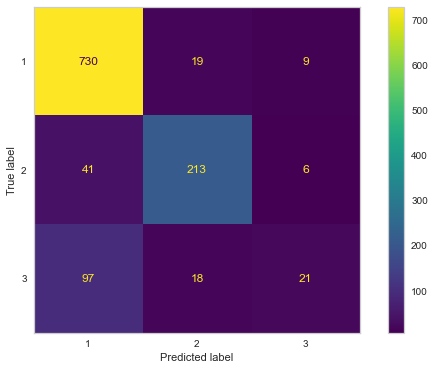

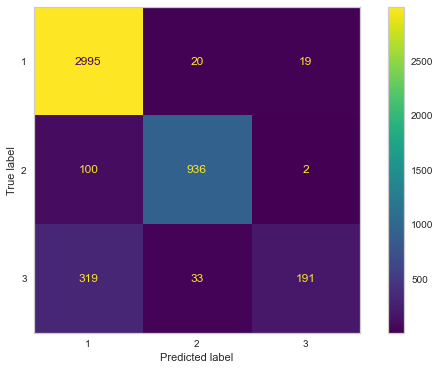

In [152]:
eval_metric(XGB_pipe_model, X_train, y_train, X_test, y_test)

###  Cross validation

In [153]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.84
test_precision_weighted   0.82
test_recall_weighted      0.84
test_f1_weighted          0.81
dtype: float64

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___